<a href="https://colab.research.google.com/github/theertharajeevan/Machine-Learning-Project/blob/main/AIR_index_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
df.dropna(inplace=True)
df=df.reset_index(drop=True)
df

,index,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
1,1,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2,2,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
3,3,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
4,4,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,6231,Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
6232,6232,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
6233,6233,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
6234,6234,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


<ipython-input-11-5e5a2879fba8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="coolwarm",annot=True);


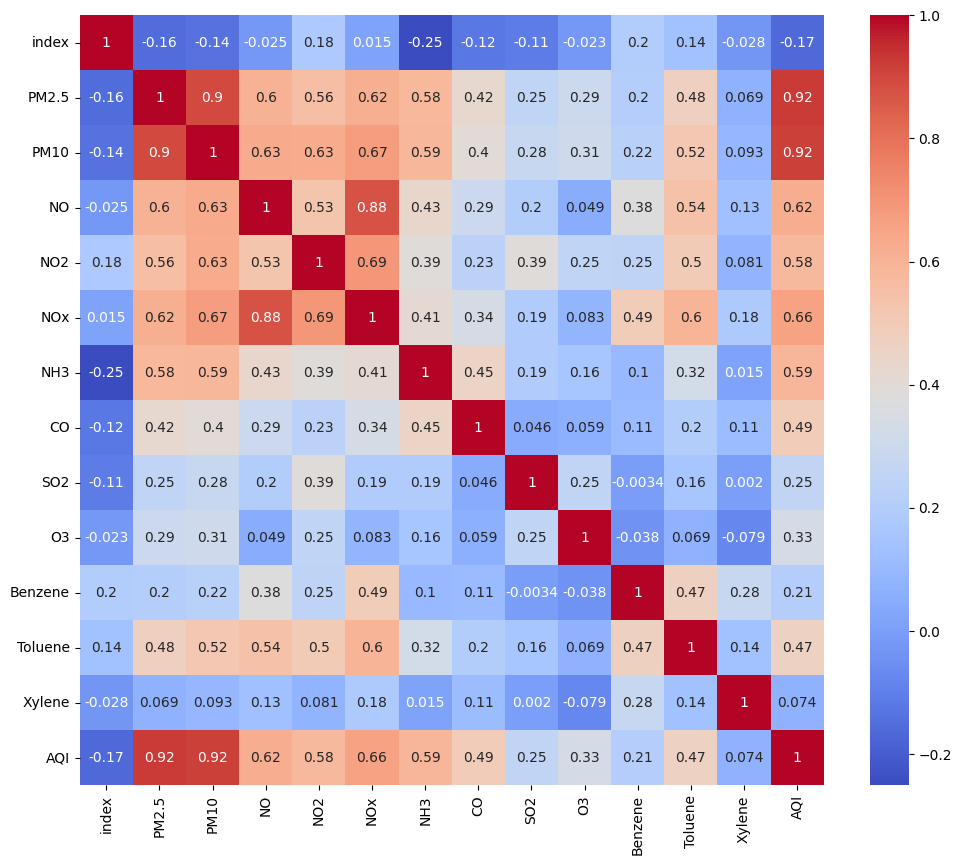

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True);

In [ ]:
df_city_day = df.copy()
df_city_day.columns

Index(['index', 'City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

Distribution of different pollutants in last 5 years


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

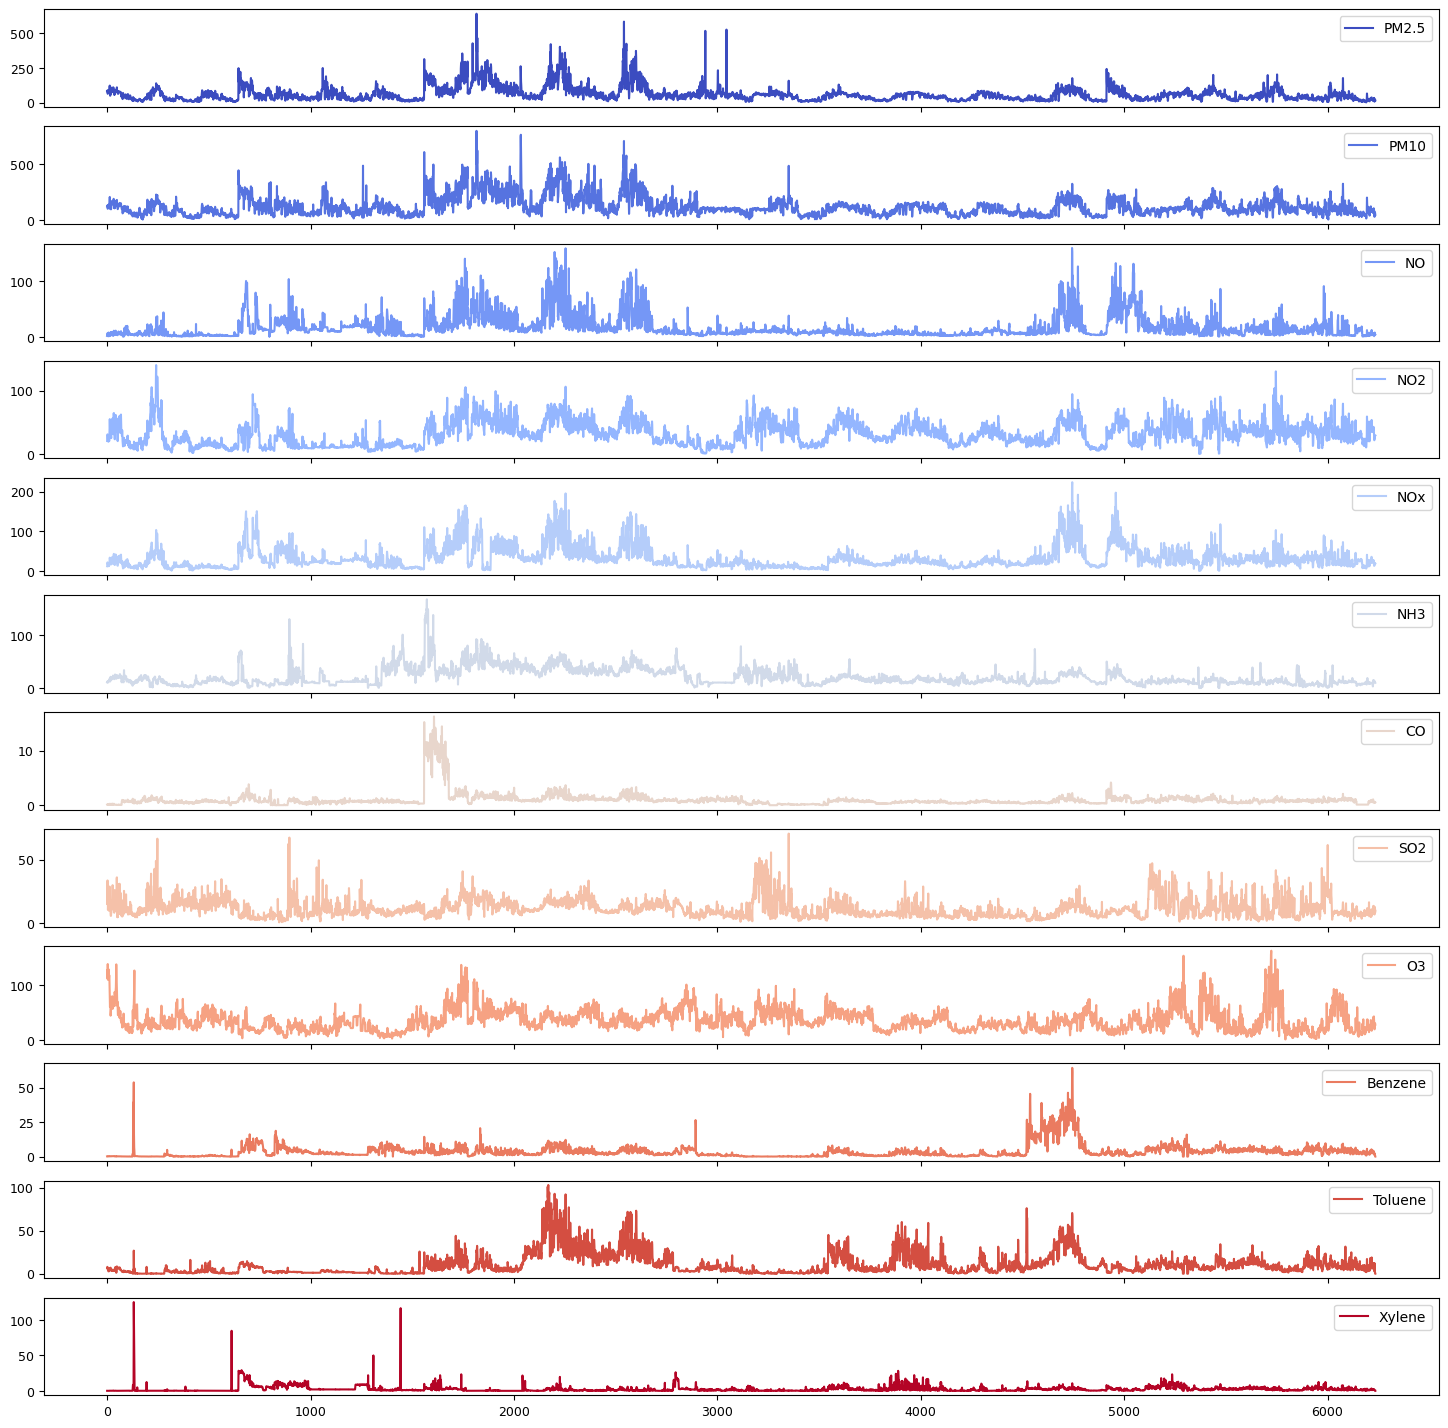

In [ ]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3','CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
df_city_day = df_city_day[pollutants]
print('Distribution of different pollutants in last 5 years')
df_city_day.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=9)

In [ ]:
x=df.drop(['City','Date','AQI_Bucket'],axis=1).values
y=df['AQI_Bucket'].values
x

array([[0.0000e+00, 8.1400e+01, 1.2450e+02, ..., 6.5000e+00, 6.0000e-02,
        1.8400e+02],
       [1.0000e+00, 7.8320e+01, 1.2906e+02, ..., 7.9500e+00, 8.0000e-02,
        1.9700e+02],
       [2.0000e+00, 8.8760e+01, 1.3532e+02, ..., 7.6300e+00, 1.2000e-01,
        1.9800e+02],
       ...,
       [6.2330e+03, 2.4380e+01, 7.4090e+01, ..., 2.2100e+00, 3.8000e-01,
        7.0000e+01],
       [6.2340e+03, 2.2910e+01, 6.5730e+01, ..., 1.0000e-02, 0.0000e+00,
        6.8000e+01],
       [6.2350e+03, 1.6640e+01, 4.9970e+01, ..., 0.0000e+00, 0.0000e+00,
        5.4000e+01]])

In [ ]:
y

array(['Moderate', 'Moderate', 'Moderate', ..., 'Satisfactory',
       'Satisfactory', 'Satisfactory'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)
x_train

array([[3.0980e+03, 5.1860e+01, 1.0824e+02, ..., 4.3800e+00, 1.2200e+00,
        1.3900e+02],
       [1.0340e+03, 6.0230e+01, 8.2570e+01, ..., 1.1100e+00, 2.0000e+00,
        8.7000e+01],
       [2.9630e+03, 3.8880e+01, 1.0693e+02, ..., 5.0100e+00, 2.1200e+00,
        9.2000e+01],
       ...,
       [5.2260e+03, 6.8700e+01, 1.0653e+02, ..., 6.7700e+00, 4.0700e+00,
        1.5000e+02],
       [5.3900e+03, 6.2290e+01, 1.2591e+02, ..., 8.2500e+00, 1.9800e+00,
        1.5300e+02],
       [8.6000e+02, 4.3930e+01, 1.0062e+02, ..., 9.7000e-01, 5.1900e+00,
        9.9000e+01]])

In [ ]:
x_test

array([[5.9900e+02, 2.3670e+01, 4.4230e+01, ..., 6.6000e-01, 1.6000e-01,
        1.0800e+02],
       [1.8440e+03, 1.2091e+02, 2.1021e+02, ..., 8.3600e+00, 1.2000e-01,
        3.3000e+02],
       [3.1070e+03, 4.0100e+01, 8.5110e+01, ..., 3.0100e+00, 3.7000e-01,
        9.9000e+01],
       ...,
       [5.3270e+03, 5.4920e+01, 1.0052e+02, ..., 4.6200e+00, 8.8000e-01,
        1.2900e+02],
       [5.0210e+03, 5.2640e+01, 1.2922e+02, ..., 4.2000e+00, 3.8000e-01,
        1.4400e+02],
       [1.7020e+03, 3.4890e+01, 1.0142e+02, ..., 6.8000e+00, 3.4200e+00,
        9.5000e+01]])

In [ ]:
y_train

array(['Moderate', 'Satisfactory', 'Satisfactory', ..., 'Moderate',
       'Moderate', 'Satisfactory'], dtype=object)

In [ ]:
y_test

array(['Moderate', 'Very Poor', 'Satisfactory', ..., 'Moderate',
       'Moderate', 'Satisfactory'], dtype=object)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array(['Satisfactory', 'Very Poor', 'Moderate', ..., 'Moderate',
       'Moderate', 'Moderate'], dtype=object)

In [ ]:
df1=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
df1

,y_test,y_pred
0,Moderate,Satisfactory
1,Very Poor,Very Poor
2,Satisfactory,Moderate
3,Good,Good
4,Good,Satisfactory
...,...,...
1866,Severe,Very Poor
1867,Very Poor,Very Poor
1868,Moderate,Moderate
1869,Moderate,Moderate


In [ ]:
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report
print('confusion_matrix','\n',confusion_matrix(y_test,y_pred))
print('*'*100)
print('accuracy_score is:',accuracy_score(y_test,y_pred))
print('*'*100)
print('classification report:',classification_report(y_test,y_pred))

confusion_matrix 
 [[105   0   0  27   0   0]
 [  0 709  13  45   0   0]
 [  0  25 151   0   0  11]
 [ 15  43   0 560   0   0]
 [  0   0   0   0  33  14]
 [  0   0  12   0   0 108]]
****************************************************************************************************
accuracy_score is: 0.8904329235702833
****************************************************************************************************
classification report:               precision    recall  f1-score   support

        Good       0.88      0.80      0.83       132
    Moderate       0.91      0.92      0.92       767
        Poor       0.86      0.81      0.83       187
Satisfactory       0.89      0.91      0.90       618
      Severe       1.00      0.70      0.82        47
   Very Poor       0.81      0.90      0.85       120

    accuracy                           0.89      1871
   macro avg       0.89      0.84      0.86      1871
weighted avg       0.89      0.89      0.89      1871

